In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
raw_data = pd.read_csv('../datas/complaints.csv')
raw_data.head()

C:\Users\Anthony\AppData\Local\Temp\ipykernel_30216\2335760170.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../datas/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77498,NaN,NaN,Web,2024-07-10,In progress,Yes,NaN,9475982
1,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76108,NaN,NaN,Web,2024-07-10,In progress,Yes,NaN,9478000
2,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48223,NaN,NaN,Web,2024-07-10,In progress,Yes,NaN,9470777
3,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77304,NaN,NaN,Web,2024-07-10,In progress,Yes,NaN,9478429
4,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76001,NaN,NaN,Web,2024-07-10,In progress,Yes,NaN,9470763


In [3]:
[raw_data.columns]

[Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Consumer complaint narrative', 'Company public response', 'Company',
        'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
        'Submitted via', 'Date sent to company', 'Company response to consumer',
        'Timely response?', 'Consumer disputed?', 'Complaint ID'],
       dtype='object')]

In [4]:
# Normalizing products
raw_data['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Credit card', 'Debt collection', 'Mortgage',
       'Checking or savings account', 'Student loan', 'Prepaid card',
       'Payday loan, title loan, personal loan, or advance loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Debt or credit management',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting', 'Credit card or prepaid card',
       'Bank account or service',
       'Payday loan, title loan, or personal loan', 'Consumer Loan',
       'Payday loan', 'Money transfers', 'Other financial service',
       'Virtual currency'], dtype=object)

In [5]:
# Mapping dictionary
mapping = {
    'Credit reporting or other personal consumer reports': 'Credit reporting',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit reporting',
    'Credit reporting': 'Credit reporting',
    'Credit card': 'Credit card',
    'Credit card or prepaid card': 'Credit card',
    'Prepaid card': 'Credit card',
    'Debt collection': 'Debt collection',
    'Mortgage': 'Mortgage',
    'Checking or savings account': 'Bank account',
    'Bank account or service': 'Bank account',
    'Student loan': 'Loan',
    'Payday loan, title loan, personal loan, or advance loan': 'Loan',
    'Payday loan, title loan, or personal loan': 'Loan',
    'Consumer Loan': 'Loan',
    'Payday loan': 'Loan',
    'Vehicle loan or lease': 'Loan',
    'Money transfer, virtual currency, or money service': 'Money transfer',
    'Money transfers': 'Money transfer',
    'Virtual currency': 'Money transfer',
    'Debt or credit management': 'Other financial service',
    'Other financial service': 'Other financial service'
}

raw_data['Normalized Products'] = raw_data['Product'].map(mapping)

In [6]:
# Normalizing issues
raw_data['Issue'].unique()

array(["Problem with a company's investigation into an existing problem",
       'Incorrect information on your report',
       'Improper use of your report', 'Getting a credit card',
       'Closing your account', 'Attempts to collect debt not owed',
       'Written notification about debt',
       'Trouble during payment process', 'Fees or interest',
       'Managing an account', 'Getting a loan',
       'Dealing with your lender or servicer', 'Communication tactics',
       'Unexpected or other fees', 'Struggling to pay your loan',
       'Took or threatened to take negative or legal action',
       'Unable to get your credit report or credit score',
       'Problem with fraud alerts or security freezes',
       'Trouble using your card', 'Managing the loan or lease',
       "Problem with a company's investigation into an existing issue",
       'Electronic communications',
       'Credit monitoring or identity theft protection services',
       'Repossession',
       'Problem with 

In [7]:
mapping = {
    "Problem with a company's investigation into an existing problem": "Investigation Issue",
    "Problem with a company's investigation into an existing issue": "Investigation Issue",
    "Problem with a credit reporting company's investigation into an existing problem": "Investigation Issue",
    "Incorrect information on your report": "Credit Report Issue",
    "Incorrect information on credit report": "Credit Report Issue",
    "Improper use of your report": "Credit Report Issue",
    "Getting a credit card": "Credit Card Issue",
    "Trouble using your card": "Credit Card Issue",
    "Problem with fraud alerts or security freezes": "Fraud or Security",
    "Credit monitoring or identity theft protection services": "Credit Monitoring",
    "Identity theft protection or other monitoring services": "Credit Monitoring",
    "Problem with a lender or other company charging your account": "Account Issue",
    "Managing an account": "Account Issue",
    "Account opening, closing, or management": "Account Issue",
    "Opening an account": "Account Issue",
    "Closing your account": "Account Issue",
    "Attempts to collect debt not owed": "Debt Collection",
    "Written notification about debt": "Debt Collection",
    "Fees or interest": "Fees or Interest",
    "Unexpected or other fees": "Fees or Interest",
    "Charged fees or interest you didn't expect": "Fees or Interest",
    "Getting a loan": "Loan Issue",
    "Dealing with your lender or servicer": "Loan Issue",
    "Managing the loan or lease": "Loan Issue",
    "Struggling to pay your loan": "Loan Issue",
    "Struggling to repay your loan": "Loan Issue",
    "Struggling to pay mortgage": "Mortgage Issue",
    "Loan modification, collection, foreclosure": "Loan Issue",
    "Loan servicing, payments, escrow account": "Loan Issue",
    "Applying for a mortgage or refinancing an existing mortgage": "Mortgage Issue",
    "Communication tactics": "Communication Issue",
    "Electronic communications": "Communication Issue",
    "Confusing or misleading advertising or marketing": "Advertising Issue",
    "Advertising and marketing, including promotional offers": "Advertising Issue",
    "Confusing or missing disclosures": "Disclosure Issue",
    "Trouble during payment process": "Payment Issue",
    "Trouble accessing funds in your mobile or digital wallet": "Payment Issue",
    "Unauthorized transactions or other transaction problem": "Transaction Issue",
    "Other transaction problem": "Transaction Issue",
    "Problem with a purchase shown on your statement": "Purchase Issue",
    "Other service problem": "Service Issue",
    "Customer service / Customer relations": "Customer Service",
    "Problem with customer service": "Customer Service",
    "Fraud or scam": "Fraud or Scam",
    "False statements or representation": "False Statements",
    "Took or threatened to take negative or legal action": "Legal Action",
    "Repossession": "Repossession",
    "Problem with a lender or other company charging your account": "Account Issue",
    "Problem adding money": "Transaction Issue",
    "Problem with additional add-on products or services": "Service Issue",
    "Identity theft protection or other monitoring services": "Credit Monitoring",
    "Unauthorized withdrawals or charges": "Transaction Issue",
    "Convenience checks": "Transaction Issue",
    "Incorrect exchange rate": "Transaction Issue",
    "Received a loan you didn't apply for": "Loan Issue",
    "Issue where my lender is my school": "Loan Issue",
    "Collection practices": "Debt Collection",
    "Charged upfront or unexpected fees": "Fees or Interest",
    "Credit card protection / Debt protection": "Credit Card Issue",
    "Issue with income share agreement": "Loan Issue",
    "Problem with cash advance": "Loan Issue",
    "Vehicle was repossessed or sold the vehicle": "Repossession",
    "Issues with repayment": "Loan Issue",
    "Credit limit changed": "Credit Card Issue",
    "Can't contact lender or servicer": "Loan Issue",
    "Problems when you are unable to pay": "Loan Issue",
    "Problem with overdraft": "Bank Account Issue",
    "Credit decision / Underwriting": "Credit Issue",
    "Problems receiving the advance": "Loan Issue",
    "Money was taken from your bank account on the wrong day or for the wrong amount": "Transaction Issue",
    "Vehicle was damaged or destroyed the vehicle": "Vehicle Issue",
    "Overdraft, savings, or rewards features": "Bank Account Issue",
    "Was approved for a loan, but didn't receive money": "Loan Issue",
    "Disclosure verification of debt": "Debt Collection",
    "Lost or stolen refund": "Transaction Issue",
    "Cont'd attempts collect debt not owed": "Debt Collection",
    "Credit line increase/decrease": "Credit Card Issue",
    "Advertising and marketing": "Advertising Issue",
    "Credit reporting company's investigation": "Investigation Issue",
    "Billing disputes": "Billing Issue",
    "Using a debit or ATM card": "Transaction Issue",
    "Billing statement": "Billing Issue",
    "Closing/Cancelling account": "Account Issue",
    "Repaying your loan": "Loan Issue",
    "Deposits and withdrawals": "Transaction Issue",
    "Can't stop charges to bank account": "Transaction Issue",
    "Identity theft / Fraud / Embezzlement": "Fraud or Scam",
    "APR or interest rate": "Fees or Interest",
    "Delinquent account": "Account Issue",
    "Settlement process and costs": "Settlement Issue",
    "Arbitration": "Legal Issue",
    "Payment to acct not credited": "Payment Issue",
    "Improper contact or sharing of info": "Privacy Issue",
    "Making/receiving payments, sending money": "Payment Issue",
    "Credit determination": "Credit Issue",
    "Payoff process": "Loan Issue",
    "Application processing delay": "Application Issue",
    "Forbearance / Workout plans": "Loan Issue",
    "Unable to get credit report/credit score": "Credit Report Issue",
    "Taking out the loan or lease": "Loan Issue",
    "Can't repay my loan": "Loan Issue",
    "Problem with credit report or credit score": "Credit Report Issue",
    "Taking/threatening an illegal action": "Legal Action",
    "Lost or stolen check": "Transaction Issue",
    "Collection debt dispute": "Debt Collection",
    "Cash advance fee": "Loan Issue",
    "Rewards": "Credit Card Issue",
    "Improper use of my credit report": "Credit Report Issue",
    "Managing, opening, or closing account": "Account Issue",
    "Dealing with my lender or servicer": "Loan Issue",
    "Other fee": "Fees or Interest",
    "Shopping for a loan or lease": "Loan Issue",
    "Unsolicited issuance of credit card": "Credit Card Issue",
    "Cash advance": "Loan Issue",
    "Excessive fees": "Fees or Interest",
    "Charged fees or interest I didn't expect": "Fees or Interest",
    "Transaction issue": "Transaction Issue",
    "Managing the line of credit": "Credit Issue",
    "Bankruptcy": "Legal Issue",
    "Unexpected/Other fees": "Fees or Interest",
    "Received a loan I didn't apply for": "Loan Issue",
    "Unauthorized transactions/trans. issues": "Transaction Issue",
    "Balance transfer fee": "Credit Card Issue",
    "Balance transfer": "Credit Card Issue",
    "Customer service/Customer relations": "Customer Service",
    "Can't contact lender": "Loan Issue",
    "Shopping for a line of credit": "Credit Issue",
    "Other transaction issues": "Transaction Issue",
    "Applied for loan/did not receive money": "Loan Issue",
    "Credit monitoring or identity protection": "Credit Monitoring",
    "Overlimit fee": "Credit Card Issue",
    "Account terms and changes": "Account Issue",
    "Other service issues": "Service Issue",
    "Fees": "Fees or Interest",
    "Sale of account": "Account Issue",
    "Incorrect/missing disclosures or info": "Disclosure Issue",
    "Adding money": "Transaction Issue",
    "Privacy": "Privacy Issue",
    "Charged bank acct wrong day or amt": "Transaction Issue",
    "Lender damaged or destroyed vehicle": "Vehicle Issue",
    "Disclosures": "Disclosure Issue",
    "Lender repossessed or sold the vehicle": "Repossession",
    "Advertising, marketing or disclosures": "Advertising Issue",
    "Overdraft, savings or rewards features": "Bank Account Issue",
    "Property was sold": "Property Issue",
    "Problem with an overdraft": "Bank Account Issue",
    "Property was damaged or destroyed property": "Property Issue",
    "Lender sold the property": "Property Issue",
    "Lender damaged or destroyed property": "Property Issue"
}

raw_data['Normalized Issues'] = raw_data['Issue'].map(mapping)

In [8]:
raw_data['State'].unique()

# List of valid US state abbreviations
valid_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

raw_data = raw_data[raw_data['State'].isin(valid_states)]

In [9]:
# Convert the 'Date sent to company' columns to datetime
raw_data['Date sent to company'] = pd.to_datetime(raw_data['Date sent to company'])

In [10]:
# Filtering critical information and dropping critical missing values
data = raw_data[['Complaint ID', 'Submitted via', 'Date sent to company', 'Company', 'State', 'Normalized Products', 'Normalized Issues', 'Consumer complaint narrative', 'Company response to consumer']]

data = data.dropna(subset=['Consumer complaint narrative'])

data = data.reset_index(drop=True)

In [11]:
co = data['Company'].str.contains('capital one', case=False)

co_data = data[co == True]

co_data = co_data.reset_index(drop=True)

In [12]:
# Filter to 2024 data
co_2024 = co_data[co_data['Date sent to company'].dt.year == 2024]
co_2024


,Complaint ID,Submitted via,Date sent to company,Company,State,Normalized Products,Normalized Issues,Consumer complaint narrative,Company response to consumer
0,8869478,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,NY,Bank account,Account Issue,On XX/XX/XXXX an ACH transfer from my business...,Closed with explanation
1,8853849,Web,2024-04-25,CAPITAL ONE FINANCIAL CORPORATION,IL,Bank account,Account Issue,On XX/XX/XXXX I attempted to open an account o...,Closed with explanation
2,8978273,Web,2024-05-10,CAPITAL ONE FINANCIAL CORPORATION,IL,Debt collection,False Statements,I received waves garnishment notification from...,Closed with explanation
3,8868861,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,FL,Credit reporting,Credit Report Issue,According to the fair credit reporting act 15 ...,Closed with explanation
4,8972467,Web,2024-05-09,CAPITAL ONE FINANCIAL CORPORATION,PA,Credit card,Purchase Issue,On XX/XX/XXXX I ordered jeans and white shirts...,Closed with monetary relief
...,...,...,...,...,...,...,...,...,...
42936,8118790,Web,2024-01-07,CAPITAL ONE FINANCIAL CORPORATION,IL,Credit reporting,Credit Report Issue,I didn't try to ask credit from this company,Closed with explanation
42937,7964722,Web,2024-01-09,CAPITAL ONE FINANCIAL CORPORATION,FL,Credit card,Purchase Issue,My Kohls card had an unauthorized purchase for...,Closed with explanation
42938,8316550,Web,2024-02-09,CAPITAL ONE FINANCIAL CORPORATION,NY,Credit card,NaN,"Good Morning Sir/Madam, See CFPB Complaint ID ...",Closed with explanation
42940,8299499,Web,2024-02-08,CAPITAL ONE FINANCIAL CORPORATION,MI,Credit reporting,Credit Report Issue,I settled and paid on a payment with Capital o...,Closed with explanation


In [27]:
# Find the total compaints in each state
by_state = co_2024.groupby('State').agg(
    Count=('Complaint ID', 'count')
).reset_index()

by_state = by_state.sort_values(by=['Count'], ascending=False)
top_state = by_state[by_state['Count'] > 200]


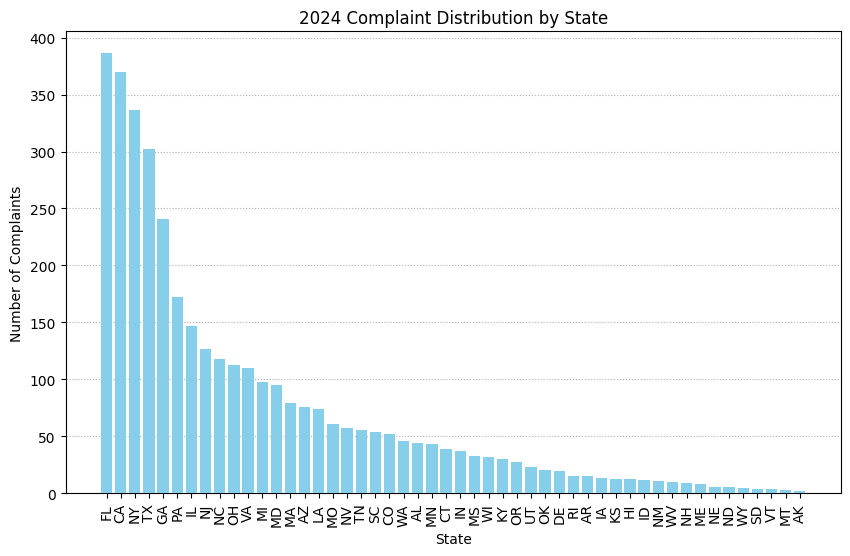

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

plt.grid(axis='y', linestyle='dotted')

# Bar plot
ax.grid(axis='y', linestyle='dotted', zorder=0)
ax.bar(by_state['State'], by_state['Count'], color='skyblue', zorder = 3)

# Adding labels and title
ax.set_xlabel('State')
ax.set_ylabel('Number of Complaints')
ax.set_title('2024 Complaint Distribution by State')

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='dotted')

plt.show()

In [36]:
top_state = co_2024[co_2024['State'].isin(['FL', 'CA', 'NY', 'GA'])]
top_state

,Complaint ID,Submitted via,Date sent to company,Company,State,Normalized Products,Normalized Issues,Consumer complaint narrative,Company response to consumer
0,8869478,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,NY,Bank account,Account Issue,On XX/XX/XXXX an ACH transfer from my business...,Closed with explanation
3,8868861,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,FL,Credit reporting,Credit Report Issue,According to the fair credit reporting act 15 ...,Closed with explanation
5,8683072,Web,2024-04-01,CAPITAL ONE FINANCIAL CORPORATION,CA,Credit card,Purchase Issue,Someone has pretended to be me since XX/XX/yea...,Closed with non-monetary relief
17,8769983,Web,2024-04-14,CAPITAL ONE FINANCIAL CORPORATION,CA,Bank account,Account Issue,I received notification in the mail at a prior...,Closed with explanation
18,8769919,Web,2024-04-14,CAPITAL ONE FINANCIAL CORPORATION,GA,Credit reporting,Credit Report Issue,"I have reached out to XXXX, XXXX, & XXXX and t...",Closed with explanation
...,...,...,...,...,...,...,...,...,...
39879,8688481,Web,2024-04-05,CAPITAL ONE FINANCIAL CORPORATION,NY,Credit card,Account Issue,A couple of weeks ago I received a charge of X...,Closed with explanation
42926,8753925,Web,2024-04-11,CAPITAL ONE FINANCIAL CORPORATION,NY,Bank account,NaN,"After the account was closed, I provided image...",Closed with explanation
42937,7964722,Web,2024-01-09,CAPITAL ONE FINANCIAL CORPORATION,FL,Credit card,Purchase Issue,My Kohls card had an unauthorized purchase for...,Closed with explanation
42938,8316550,Web,2024-02-09,CAPITAL ONE FINANCIAL CORPORATION,NY,Credit card,NaN,"Good Morning Sir/Madam, See CFPB Complaint ID ...",Closed with explanation


In [38]:
top_state['Normalized Issues'].isna().sum()

183

Sentiment Analysis

In [112]:
from flair.models import TextClassifier
from flair.data import Sentence

In [113]:
sentiment_model = TextClassifier.load('en-sentiment')

In [118]:
sample = "hello world"
sample = Sentence(sample)

sentiment_model.predict(sample)

In [119]:
sample, sample.labels[0].value, sample.labels[0].score

(Sentence[2]: "hello world" → POSITIVE (0.9759),
 'POSITIVE',
 0.9759482741355896)

In [117]:
sentiment = []
confidence = []

for sentence in top_state['Consumer complaint narrative']:
    if sentence == '':
        sentiment.append('')
        confidence.append('')

    else:
        sample = Sentence(sentence)
        sentiment_model.predict(sample)
        sentiment.append(sample.labels[0].value)
        confidence.append(sample.labels[0].score)


In [126]:
top_state['Sentiment'] = sentiment
top_state['Confidence'] = confidence
top_state.head()

C:\Users\Anthony\AppData\Local\Temp\ipykernel_30216\3988178681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_state['Sentiment'] = sentiment
C:\Users\Anthony\AppData\Local\Temp\ipykernel_30216\3988178681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_state['Confidence'] = confidence


,Complaint ID,Submitted via,Date sent to company,Company,State,Normalized Products,Normalized Issues,Consumer complaint narrative,Company response to consumer,Sentiment,Confidence
0,8869478,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,NY,Bank account,Account Issue,"On XX/XX/XXXX an ACH transfer from my business checking account at Capital One was sent out to make a payment to a vendor for {$5000.00} USD. The vendor never received the payment. Please note this was for an OUTGOING transfer noted as "" XXXX PAYMENT TO ... XXXX '' in my account. \n\nOn XX/XX/XXXX I called the bank to inquire as to the transfer. I requested a trace number and the representative told me they didn't have one. I was told a claim would be started to find out where the money was ( claim # ending in XXXX ). In the meantime, she said they would refund my account. I was told this would take up to 10 business days. I asked for a trace number but they could not provide one. \n\nOn XX/XX/XXXX they sent a letter. \n\nOn XX/XX/XXXX I received said letter which said my claim was denied because their "" records didn't show an INCOMING deposit from XXXX PAYMENT TO ... XXXX XXXX They asked me to verify with the "" sender '' their XXXX digit trace number. \n\non XX/XX/XXXX at XXXX pm I spoke with a Capital One rep ( XXXX ID # XXXX ) who did not seem to understand we were referring t an OUTgoing transfer rather than incoming. She finally seemed to understand the situation and said she would update the claim. I asked for a trace number but they could not provide one. \n\nOn XX/XX/XXXX I called again to check on the claim. I spoke with multiple representatives who kept passing me from one department to another. All of them were still under the impression we were talking about an INCOMING transfer. \n\nFinally, I was transfered to XXXX in the claims department. XXXX refused to give me her employee ID #. XXXX said the info she had on file was : - XX/XX/XXXX case opened - XX/XX/XXXX case closed - XXXX XXXX case closed again? \n- XXXX XXXX rebutal submitted after my phone call - XXXX XXXX case closed again, I was never informed. \n\nShe said the case was closed again on XX/XX/XXXX because they did not receive enough information. She said the missing information pertained to the trace number on the transaction. I asked again if she had a trace number ; she said no. I asked how I was supposed to provide a trace number for an OUTgoing transfer when they, the OUTgoing bank, did not have it to begin with. She was confused. \n\nAt XXXX pm ( one hour into the phone call ) she began opening a new claim ( new claim ending in # XXXX ). She said it would take 45 days to hear back on the new claim. I told her I did not want to wait that long given I have already waited 90 days for my XXXX XXXX dollars to be found. She said she could not expedite it so now I have to wait another month and a half for them to "" investigate '' what happened to the money.",Closed with explanation,NEGATIVE,0.999845
3,8868861,Web,2024-04-26,CAPITAL ONE FINANCIAL CORPORATION,FL,Credit reporting,Credit Report Issue,"According to the fair credit reporting act 15 USC 1681 section 602 There is a need to insure that consumer reporting agencies exercise their grave responsibility with fairness, impartiality, and a respect for the consumers right to privacy. \n\nThe credit bureaus are consumer reporting agencies and I am the consumer. I do have a right to make sure my private information isnt shared which is backed by 15 USC 6801 It is the policy of congress that each financial institution has an affirmative and continuing obligation to respect the privacy of its customers and to protect the security and confidentiality of those customers no public personal information. \n\nThe credit bureaus dont have my written or verbal consent to furnish this information. \nAll consent is revoked. \n\n15 USC 6802 - a financial institution may not disclose non public personal information to a non affiliated third party unles

In [121]:
positive_sentiment = top_state[top_state['Sentiment'] == 'POSITIVE']
positive_sentiment = positive_sentiment[['Complaint ID', 'State', 'Normalized Products', 'Normalized Issues', 'Consumer complaint narrative', 'Confidence']]

In [122]:
pd.set_option('display.max_colwidth', None)

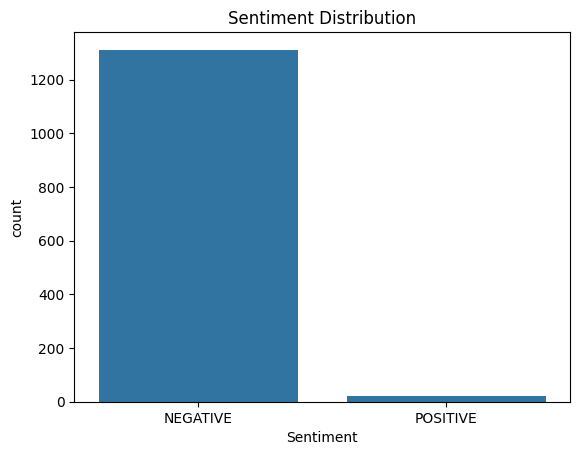

In [123]:
# Bar chart
sns.countplot(x='Sentiment', data=top_state)
plt.title('Sentiment Distribution')
plt.show()

In [124]:
# Product analysis
product_sentiment = top_state.groupby('Normalized Products')['Sentiment'].value_counts(normalize=True).unstack()
product_sentiment

Sentiment,NEGATIVE,POSITIVE
Normalized Products,,
Bank account,1.000000,NaN
Credit card,0.986513,0.013487
Credit reporting,0.981618,0.018382
Debt collection,0.965517,0.034483
Loan,0.954545,0.045455
Money transfer,1.000000,NaN
Other financial service,1.000000,NaN


In [125]:
# Issue analysis
issue_sentiment = top_state.groupby('Normalized Issues')['Sentiment'].value_counts(normalize=True).unstack()
issue_sentiment

Sentiment,NEGATIVE,POSITIVE
Normalized Issues,,
Account Issue,1.000000,NaN
Advertising Issue,0.956522,0.043478
Communication Issue,1.000000,NaN
Credit Card Issue,0.989130,0.010870
Credit Monitoring,1.000000,NaN
Credit Report Issue,0.980198,0.019802
Debt Collection,0.970149,0.029851
Disclosure Issue,1.000000,NaN
False Statements,0.833333,0.166667
